In [1]:
import os, sys, warnings

import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context(context='poster')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.monospace'] = 'Andale Mono'
# mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.default'] = 'rm'

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['text.usetex'] = False
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{wasysym}',
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
]

bigsize   = 20
midsize   = 20
smallsize = 15
# hugesize  = 24

In [2]:
sys.path.append('.'); warnings.simplefilter(action='ignore', category=FutureWarning);

In [ ]:
from figdata import ref, xlsx_tab, sum_df, good_df, cells_tab
from figdata import sample_colors, good_pos, r_acen, chrf, bigCNV, big_cnv_cells, big_cnv_idx

In [4]:
from A4_ShowCell import showCell

In [5]:
import networkx as nx
from glob import glob

from scipy.spatial.distance import euclidean
from itertools import permutations
from tqdm.auto import tqdm

In [6]:
FSAMPLE = True
FSAMPLE = False

In [7]:
two_colors = sns.xkcd_palette(['bright blue','red'])

good_cells = good_df.xs(key='copy',axis=1,level=1).columns

clone_cells = sum_df.loc[big_cnv_idx].query('Space=="chr6" & Sample=="XXX" & chrom_fraction>20 & chrom_fraction<70')['Cell'].unique()

male_cells = good_cells[ 
    pd.Series(good_cells).str.split('_',expand=True).reset_index().set_index(0).loc[ xlsx_tab.query('GENDER=="male"')['SAMPLE'], 'index' ]
]

female_cells = good_cells[ 
    pd.Series(good_cells).str.split('_',expand=True).reset_index().set_index(0).loc[ xlsx_tab.query('GENDER=="female"')['SAMPLE'], 'index' ]
]

male_heatmap   = pd.read_csv('male_heatmap.csv',   index_col=0)
female_heatmap = pd.read_csv('female_heatmap.csv', index_col=0)

male_fig_df = male_heatmap.reindex(columns=big_cnv_cells).dropna(how='all',axis=1).T
male_fig_df.loc[:,male_fig_df.columns[male_fig_df.columns.str.contains(r'chr[X|Y]:')]] += 1
male_fig_df = male_fig_df.loc[:, ~male_fig_df.columns.str.contains('chrY')]

female_fig_df = female_heatmap.reindex(columns=big_cnv_cells).dropna(how='all',axis=1).T
female_fig_df.loc[:,female_fig_df.columns[female_fig_df.columns.str.contains(r'chrY:')]] += 2
female_fig_df = female_fig_df.loc[:, ~female_fig_df.columns.str.contains('chrY')]

In [8]:
auto_idx = good_df.index[good_df.index.str.contains(r'chr[\d+|X]')]
# auto_idx = good_df.index[good_df.index.str.contains(r'chr\d+')]

color_dict = dict(zip(xlsx_tab['SAMPLE'], sample_colors))

In [9]:
male_edis_df = pd.read_pickle('male_edis_df.pkl')
# male_edis_df = pd.DataFrame()

# for s in tqdm( xlsx_tab.query('GENDER=="male"')['SAMPLE'] ):

#     sample_cells = male_fig_df.index[male_fig_df.index.str.contains(s)].tolist()

#     for a,b in permutations(sample_cells, 2):
#         d = euclidean(male_fig_df.loc[a,auto_idx],male_fig_df.loc[b,auto_idx])
#         male_edis_df = male_edis_df.append( {'a':a,'b':b,'s':s,'d':d}, ignore_index=True )

# male_edis_df.to_pickle('male_edis_df.pkl')

In [10]:
female_edis_df = pd.read_pickle('female_edis_df.pkl')

# female_edis_df = pd.DataFrame()

# for s in tqdm( xlsx_tab.query('GENDER=="female"')['SAMPLE'] ):

#     sample_cells = female_fig_df.index[female_fig_df.index.str.contains(s)].tolist()

#     for a,b in permutations(sample_cells, 2):
#         d = euclidean(female_fig_df.loc[a,auto_idx],female_fig_df.loc[b,auto_idx])
#         female_edis_df = female_edis_df.append( {'a':a,'b':b,'s':s,'d':d}, ignore_index=True )

# female_edis_df.to_pickle('female_edis_df.pkl')

In [11]:
if not FSAMPLE:
    male_edis_df = male_edis_df.query('s!="$FSAMPLE"')
    color_dict = pd.Series(color_dict).drop('XXX').rename(index={'$FSAMPLE':'XXX'}).to_dict()

---

---

---

In [16]:
def ebar_plot(ax1, ax2):

    fig_df1 = np.floor(  male_edis_df['d']).astype(int).value_counts().reset_index().rename(columns={'d':'counts','index':'d'})
    fig_df2 = np.floor(female_edis_df['d']).astype(int).value_counts().reset_index().rename(columns={'d':'counts','index':'d'})

    ax1.bar(fig_df1['d'],fig_df1['counts']/2, color='gray')
    ax2.bar(fig_df2['d'],fig_df2['counts']/2, color='gray')

    ax1.set_xlim(-2,42)
    ax2.set_xlim(-2,42)

    ax1.set_xlabel('Distance', fontsize=midsize)
    ax2.set_xlabel('Distance', fontsize=midsize)

    ax1.set_ylim(0,3000)
    ax2.set_ylim(0,9000)

    ax1.set_ylabel('# of cells pair', fontsize=midsize)

    ax1.set_yticks(np.arange(0,3001,1000))
    ax2.set_yticks(np.arange(0,9001,3000))
    ax1.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
    ax2.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
    ax1.yaxis.get_offset_text().set_fontsize(smallsize)
    ax2.yaxis.get_offset_text().set_fontsize(smallsize)

    ax1.tick_params(axis='both', labelsize=smallsize, length=5)
    ax2.tick_params(axis='both', labelsize=smallsize, length=5)

    ax1.set_title('Male', fontsize=bigsize)
    ax2.set_title('Female', fontsize=bigsize)

    ax1.vlines( 9, 0, 3000,  linestyle='dashed')
    ax2.vlines( 9, 0, 12000, linestyle='dashed')

    return 

In [17]:
def clone_plot(ax1,ax2,ax3,ax4, FSAMPLE=True):

    fig_df3 = pd.DataFrame(columns=['Sample','Clone_size','Cells'])
    for s,df in male_edis_df.query('d<10').groupby('s'):
        G = nx.Graph()
        G.add_nodes_from(df['a'].unique().tolist())
        G.add_edges_from(df[['a','b']].values, length=df['d'].values)
        for h in nx.connected_components(G):
            fig_df3 = fig_df3.append( {'Sample':s, 'Clone_size':len(h), 'Cells':list(h)}, ignore_index=True )

    fig_df4 = pd.DataFrame(columns=['Sample','Clone_size','Cells'])
    for s,df in female_edis_df.query('d<10').groupby('s'):
        G = nx.Graph()
        G.add_nodes_from(df['a'].unique().tolist())
        G.add_edges_from(df[['a','b']].values, length=df['d'].values)
        for h in nx.connected_components(G):
            fig_df4 = fig_df4.append( {'Sample':s, 'Clone_size':len(h), 'Cells':list(h)}, ignore_index=True )

    for g,df in fig_df3.query('Clone_size>2').groupby('Clone_size'):
        df = df.set_index('Sample').loc[xlsx_tab['SAMPLE']].dropna().reset_index().copy()
        df['ncum'] = np.arange(df.shape[0])
        df.apply(lambda row: ax1.bar(g,1,bottom=row['ncum'], width=0.6, color=color_dict[row['Sample']], edgecolor='k'), axis=1)
        df.apply(lambda row: ax2.bar(g,1,bottom=row['ncum'], width=0.6*6*5/4, color=color_dict[row['Sample']], edgecolor='k',label=row['Sample']), axis=1)

    for g,df in fig_df4.query('Clone_size>2').groupby('Clone_size'):
        df = df.set_index('Sample').loc[xlsx_tab['SAMPLE']].dropna().reset_index().copy()
        df['ncum'] = np.arange(df.shape[0])
        df.apply(lambda row: ax3.bar(g,1,bottom=row['ncum'], width=0.6, color=color_dict[row['Sample']], edgecolor='k'), axis=1)
        df.apply(lambda row: ax4.bar(g,1,bottom=row['ncum'], width=0.6*6*5/4, color=color_dict[row['Sample']], edgecolor='k',label=row['Sample']), axis=1)

#     ax1.set_xlim(0,32)
#     ax3.set_xlim(0,32)
#     ax2.set_xlim(40,120)
#     ax4.set_xlim(40,120)
#     ax1.set_xticks(np.arange(0,31,10))
#     ax3.set_xticks(np.arange(0,31,10))
#     ax2.set_xticks(np.arange(50,121,20))
#     ax4.set_xticks(np.arange(50,121,20))

    ax1.set_xlim(0,15)
    ax3.set_xlim(0,15)
    ax2.set_xlim(25,115)
    ax4.set_xlim(25,115)
    ax1.set_xticks(np.arange(0,20,5))
    ax3.set_xticks(np.arange(0,20,5))
    ax2.set_xticks(np.arange(30,121,20))
    ax4.set_xticks(np.arange(30,121,20))
    
    ax1.set_ylim(0,15)
    ax2.set_ylim(0,15)
    ax3.set_ylim(0,15)
    ax4.set_ylim(0,15)

    ax1.set_yticks(np.arange(0,16,5))
    ax3.set_yticks(np.arange(0,16,5))
    ax2.set_yticks([])
    ax4.set_yticks([])

#     ax2.set_title(' '*12+'Male', fontsize=bigsize)
#     ax4.set_title(' '*12+'Female', fontsize=bigsize)
#     ax1.set_xlabel(' '*32+'Clone size', fontsize=midsize)
#     ax3.set_xlabel(' '*32+'Clone size', fontsize=midsize)
    
    ax1.spines['right'].set_visible(False)
    ax2.spines['left' ].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['left' ].set_visible(False)
    
    ax1.set_ylabel('Counts', fontsize=midsize)

    ax1.tick_params(axis='both', labelsize=smallsize, length=5)
    ax2.tick_params(axis='both', labelsize=smallsize, length=5)
    ax3.tick_params(axis='both', labelsize=smallsize, length=5)
    ax4.tick_params(axis='both', labelsize=smallsize, length=5)

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    kwargs.update(transform=ax2.transAxes)
    ax1.plot((-d*3/2, +d*3/2), (1-d, 1+d), **kwargs)
    kwargs.update(transform=ax1.transAxes)
    ax2.plot((1-d, 1+d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d*3/2, +d*3/2), (-d, +d), **kwargs)

    kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
    ax3.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    kwargs.update(transform=ax4.transAxes)
    ax3.plot((-d*3/2, +d*3/2), (1-d, 1+d), **kwargs)
    kwargs.update(transform=ax3.transAxes)
    ax4.plot((1-d, 1+d), (-d, +d), **kwargs)
    kwargs.update(transform=ax4.transAxes)
    ax4.plot((-d*3/2, +d*3/2), (-d, +d), **kwargs)
    
    anot_kws = {
        'fontsize':smallsize,
        'ha':'center', 'va':'center',
        'arrowprops':dict(arrowstyle="->")
    }

    n_df = fig_df3.query('Clone_size==31')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    
    if not FSAMPLE:
        lid = lid.replace('M11','M10')
        
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax2.annotate( lid+'\n'+cid, xy=(31, 1.5), xytext=(50, 5), **anot_kws )

    n_df = fig_df4.query('Clone_size==11')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax3.annotate( 
        lid+'\n'+cid, xy=(11, 1.5),  xytext=(7, 10), 
        fontsize=smallsize, 
        ha='center',va='center', 
        color=two_colors[1],
        arrowprops=dict(arrowstyle="->"), 
#         bbox=dict(boxstyle='round4', fc="w", pad=0.5) 
    )

    n_df = fig_df4.query('Clone_size==12')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax3.annotate( lid+'\n'+cid, xy=(12, 1.5),  xytext=(13, 10), **anot_kws, zorder=1)

    n_df = fig_df4.query('Clone_size==13')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax3.annotate( lid+'\n'+cid, xy=(13, 1.5),  xytext=(14, 5), **anot_kws, zorder=1)

    n_df = fig_df4.query('Clone_size==31')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax4.annotate( lid+'\n'+cid, xy=(31, 2),  xytext=(13, 10), **anot_kws, zorder=0, color='w', alpha=0)

    n_df = fig_df4.query('Clone_size==46')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax4.annotate( lid+'\n'+cid, xy=(46, 1.5),  xytext=(40, 7), **anot_kws )

    n_df = fig_df4.query('Clone_size==53')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax4.annotate( lid+'\n'+cid, xy=(53, 1.5),  xytext=(70, 7), **anot_kws )

    n_df = fig_df4.query('Clone_size==105')
    lid = xlsx_tab.set_index('SAMPLE').loc[n_df['Sample'], 'CODE'].values[0]
    cid = sum_df.set_index('Cell').loc[n_df['Cells'].tolist()[0],'Space'].value_counts().index[0]
    ax4.annotate( lid+'\n'+cid, xy=(105, 1.5),  xytext=(100, 7), **anot_kws )

    return fig_df3,fig_df4

In [19]:
r_list = []
c_list = []

for file in glob('./99.Save/01.bam_stat_list/*.cov.list'):
    df = pd.read_csv(file,sep='\t',header=None)
    new_df = df[0].str.split(':',expand=True)
    names = new_df[0].str.replace('/','_').str.replace('.cov.bed','')
    chrs = new_df[1]
    counts = df[3]
    
    count_df = pd.concat(
        [
            names,
            chrs,
            counts
        ], axis=1
    )
    count_df = count_df.rename(columns={0:'Name',1:'chroms',3:'counts'})
    
    ratio_df = pd.concat(
        [
            count_df.drop('counts', axis=1).set_index('Name'),
            100*(count_df.set_index('Name')/count_df.groupby('Name').sum())['counts'],
        ], axis=1
    )

    c_list.append(count_df)
    r_list.append(ratio_df)

r_df = pd.concat(r_list)
samples = r_df.reset_index()['Name'].str.split('_', expand=True)[0]
samples.index = r_df.index
r_df['Sample'] = samples

c_df = pd.concat(c_list)
samples = c_df['Name'].str.split('_', expand=True)[0]
samples.index = c_df.index
c_df['Sample'] = samples

c_df = c_df.set_index(['Name','chroms'])

fig_data_df = pd.merge(
    r_df.loc[good_df.xs(key='copy', level=1, axis=1).columns].reset_index(), 
    xlsx_tab, 
    left_on='Sample',right_on='SAMPLE'
)

if not FSAMPLE:
    fig_data_df = fig_data_df.query('Sample!="$FSAMPLE"').replace('M11','M10')

In [20]:
def gain_loss_plot(chrom, ax):

    if chrom == 'chrX':
        x = fig_data_df.query('GENDER=="female" & chroms=="chrX"')
        xn = x.set_index('Name').drop(sum_df.query('Space=="chrX"')['Cell'].unique(), errors='ignore')
        xl = x.set_index('Name').loc[sum_df.query('Gender=="female" & chrom_fraction>=95 & Space=="chrX" & cnvTag=="Loss" & HMMseg>0.5')['Cell'].unique()]
        xg = x.set_index('Name').loc[sum_df.query('Gender=="female" & chrom_fraction>=95 & Space=="chrX" & cnvTag=="Gain" & HMMseg<3.5')['Cell'].unique()]
    elif chrom == 'chr21':
        x = fig_data_df.query('chroms==@chrom')
        xn = x.set_index('Name').drop(sum_df.query('Space=="chr21"')['Cell'].unique(), errors='ignore')
        xl = x.set_index('Name').loc[sum_df.query('chrom_fraction>=95 & Space=="chr21" & cnvTag=="Loss" & HMMseg>0.5')['Cell'].unique()]
        xg = x.set_index('Name').loc[sum_df.query('chrom_fraction>=95 & Space=="chr21" & cnvTag=="Gain" & HMMseg<3.5')['Cell'].unique()]
    else:
        raise NotImplementedError

    xbins = np.linspace( 
        np.floor( x['counts'].quantile(0.005) )-1, 
        np.ceil(  x['counts'].quantile(0.995) )+1,
        50 
    )

    xn['bc'] = pd.cut( 
        x      = xn['counts'],
        bins   = xbins,
        labels = (xbins[:-1]+xbins[1:])/2
    ).astype(np.float).copy()

    xl['bc'] = pd.cut( 
        x      = xl['counts'],
        bins   = xbins,
        labels = (xbins[:-1]+xbins[1:])/2
    ).astype(np.float).copy()


    xg['bc'] = pd.cut( 
        x      = xg['counts'],
        bins   = xbins,
        labels = (xbins[:-1]+xbins[1:])/2
    ).astype(np.float).copy().fillna(xbins[-1])

    xn_bc = (xn['bc'].value_counts()/xn.shape[0]).reset_index()
    xl_bc = (xl['bc'].value_counts()/xl.shape[0]).reset_index()
    xg_bc = (xg['bc'].value_counts()/xg.shape[0]).reset_index()

    xnm = xn['counts'].mean()
    xlm = xl['counts'].mean()
    xgm = xg['counts'].mean()

    xns = xn['counts'].std()
    xls = xl['counts'].std()
    xgs = xg['counts'].std()

    rects1 = ax.bar(xn_bc['index'], xn_bc['bc'], width=xbins[1]-xbins[0], color='gray',        label='Normal', zorder=1)
    rects2 = ax.bar(xl_bc['index'], xl_bc['bc'], width=xbins[1]-xbins[0], color=two_colors[0], label='Loss', zorder=1)
    rects3 = ax.bar(xg_bc['index'], xg_bc['bc'], width=xbins[1]-xbins[0], color=two_colors[1], label='Gain', zorder=1)

    ax.vlines( xnm, 0, 0.8, color='k', lw=2, linestyles='dashed')
    ax.vlines( xlm, 0, 0.8, color='k', lw=2, linestyles='dashed')
    ax.vlines( xgm, 0, 0.8, color='k', lw=2, linestyles='dashed')

    ax.fill_between( [xnm-3*xns, xnm+3*xns], [1,1], color='gray',        alpha=0.2, zorder=0)
    ax.fill_between( [xlm-3*xls, xlm+3*xls], [1,1], color=two_colors[0], alpha=0.2, zorder=0)
    ax.fill_between( [xgm-3*xgs, xgm+3*xgs], [1,1], color=two_colors[1], alpha=0.2, zorder=0)
    
    n2n = xn.where(
        (xn['counts']>=xnm-3*xns) & (xn['counts']<=xnm+3*xns)
    ).dropna()
    g2g = xg.where(
        (xg['counts']>=xgm-3*xgs) & (xg['counts']<=xgm+3*xgs)
    ).dropna()
    l2l = xl.where(
        (xl['counts']>=xlm-3*xls) & (xl['counts']<=xlm+3*xls)
    ).dropna()
    
    ax.text( 
        xnm, 0.9, 
        '{:.2f}%'.format( 
            n2n.shape[0]/xn.shape[0]*100 
        ),
        va='center', ha='center', fontsize=12
    )

    ax.text( 
        xlm, 0.9, 
        '{:.2f}%'.format(
            l2l.shape[0]/xl.shape[0]*100
        ),
        va='center', ha='center', fontsize=12
    )

    ax.text( 
        xgm, 0.9, 
        '{:.2f}%'.format( 
            g2g.shape[0]/xg.shape[0]*100 
        ),
        va='center', ha='center', fontsize=12
    )

    if chrom =='chr21':
        ax.set_xlim( 0.2, 2.3  )
        ax.set_title(chrom, fontsize=bigsize)
    elif chrom =='chrX':
        ax.set_xlim(1,8)
        ax.set_title('Female chrX', fontsize=bigsize)
    else:
        raise NotImplementedError

    ax.set_ylim(-1e-3,1)
    
    ax.set_xlabel('% of reads', fontsize=midsize)
    ax.set_ylabel('Cell fractions', fontsize=midsize)

    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.tick_params(axis='both', labelsize=smallsize, length=5)
    
    ax.arrow( xnm-3*xns, 0.8, -1*((xnm-3*xns)-(xlm+3*xls)), 0, width=0.01, head_width=0.03, head_length=0.08, color='k')
    ax.arrow( xnm+3*xns, 0.8, -1*((xnm+3*xns)-(xgm-3*xgs)), 0, width=0.01, head_width=0.03, head_length=0.08, color='k')

    n2l = xn.where(
        (xn['counts']<=xlm+3*xls)
    ).dropna()
    
    n2g = xn.where(
        (xn['counts']>=xgm-3*xgs)
    ).dropna()

    l2n = xl.where(
        (xl['counts']>=xnm-3*xns)
    ).dropna()
    
    g2n = xg.where(
        (xg['counts']<=xnm+3*xns)
    ).dropna()

    ax.text( 
        ((xnm-3*xns)+(xlm+3*xls))/2, 0.75, 
        '{:.2f}%'.format( 
            n2l.shape[0]/xn.shape[0]*100 
        ),
        va='center', ha='center', fontsize=10
    )
    
    ax.text( 
        ((xnm+3*xns)+(xgm-3*xgs))/2, 0.75, 
        '{:.2f}%'.format( 
            n2g.shape[0]/xn.shape[0]*100 
        ),
        va='center', ha='center', fontsize=10
    )

    right_list = [ n2n, g2g, l2l ]
    error_list = [ n2l, n2g, l2n, g2n ]
    total_n = xl.shape[0] + xg.shape[0] + xn.shape[0]
    
    return rects1, rects2, rects3, right_list, error_list, total_n

In [21]:
def gain_loss_plot_chrY(ax):

    x = fig_data_df.query('chroms=="chrY"')

    xbins = np.linspace( 
        0, np.ceil(  x['counts'].quantile(0.995) ),
        50 
    )

    xl = x.query('GENDER=="female"').set_index('Name').drop(sum_df.query('chrom_fraction>=95 & Space=="chrX"')['Cell'].unique(), errors='ignore')
    xg = x.query('GENDER=="male"').set_index('Name')

    xl['bc'] = pd.cut( 
        x      = xl['counts'],
        bins   = xbins,
        labels = (xbins[:-1]+xbins[1:])/2
    ).astype(np.float).copy()

    xg['bc'] = pd.cut( 
        x      = xg['counts'],
        bins   = xbins,
        labels = (xbins[:-1]+xbins[1:])/2
    ).astype(np.float).copy().fillna(xbins[-1])

    xl_bc = (xl['bc'].value_counts()/xl.shape[0]).reset_index()
    xg_bc = (xg['bc'].value_counts()/xg.shape[0]).reset_index()

    xlm = xl['counts'].mean()
    xgm = xg['counts'].mean()

    xls = xl['counts'].std()
    xgs = xg['counts'].std()

    pd.Series( xg[(xg['counts']<=xlm+3*xls)].index.unique().tolist() ).to_pickle('chrY_loss_cells.pkl')    

    rects1 = ax.bar(xl_bc['index'], xl_bc['bc'], width=xbins[1]-xbins[0], color=two_colors[0], label='Female', zorder=0)
    rects2 = ax.bar(xg_bc['index'], xg_bc['bc'], width=xbins[1]-xbins[0], color=two_colors[1], label='Male', zorder=1)

    ax.vlines( xlm, 0, 0.8, color='k', lw=2, linestyles='dashed')
    ax.vlines( xgm, 0, 0.8, color='k', lw=2, linestyles='dashed')

    ax.fill_between( [xlm-3*xls, xlm+3*xls], [1.2,1.2], color=two_colors[0], alpha=0.2, zorder=0)
    ax.fill_between( [xgm-3*xgs, xgm+3*xgs], [1.2,1.2], color=two_colors[1], alpha=0.2, zorder=0)

    ax.text( 
        xlm, 1.0, 
        '{:.2f}%'.format(
            xl.where(
                (xl['counts']>=xlm-3*xls) & (xl['counts']<=xlm+3*xls)
            ).dropna().shape[0]/xl.shape[0]*100
        ),
        va='center', ha='center', fontsize=12
    )

    ax.text( 
        xgm, 1.0, 
        '{:.2f}%'.format( 
            xg.where(
                (xg['counts']>=xgm-3*xgs) & (xg['counts']<=xgm+3*xgs)
            ).dropna().shape[0]/xg.shape[0]*100 
        ),
        va='center', ha='center', fontsize=12
    )

    ax.set_xlim( -0.03, 0.3  )
    ax.set_ylim(-1e-3,1.1)
    ax.set_title('chrY', fontsize=bigsize)
    ax.set_xlabel('% of reads', fontsize=midsize)
    ax.set_ylabel('Cell fractions', fontsize=midsize)

    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.tick_params(axis='both', labelsize=smallsize, length=5)
    
    ax.arrow( xgm-3*xgs, 0.9, -1*((xgm-3*xgs)-(xlm+3*xls)), 0, width=0.005, head_width=0.03, head_length=0.01, color=two_colors[0])

    ax.text( 
        ((xgm-3*xgs)+(xlm+3*xls))/2, 0.85, 
        '{:.2f}%'.format( 
            xg.where(
                (xg['counts']<=xlm+3*xls)
            ).dropna().shape[0]/xg.shape[0]*100 
        ),
        color=two_colors[0],
        va='center', ha='center', fontsize=12
    )

    y_loss_df = xg.where(
        (xg['counts']<=xlm+3*xls)
    ).dropna()
    
    return rects1, rects2, y_loss_df

In [22]:
def add_clone_legend(ax, FSAMPLE=True):
    handles, labels = ax.get_legend_handles_labels()

    legend_df1 = (
        pd.Series(labels)
        .drop_duplicates()
        .reset_index()
        .set_index(0)
        .merge(
            xlsx_tab.set_index('SAMPLE'),
            left_index=True,
            right_index=True,
        ).sort_values('CODE')
    )
    
    if not FSAMPLE:
        legend_df1 = legend_df1.replace('M11','M10')

    ax.legend(
        np.array(handles).flatten()[legend_df1['index'].values],
        legend_df1['CODE'].str.replace('M','').str.replace('F','').values,
        loc='upper right',
        prop={'size':smallsize},
        handletextpad=0.5,
        columnspacing=-0.5,
        labelspacing=0,
        edgecolor='k',
        ncol=2,
        markerfirst=False,
        borderpad=0.2,
    )

    for h in ax.get_legend().legendHandles:
        h.set_width(10)

    lg = ax.get_legend()
    return lg

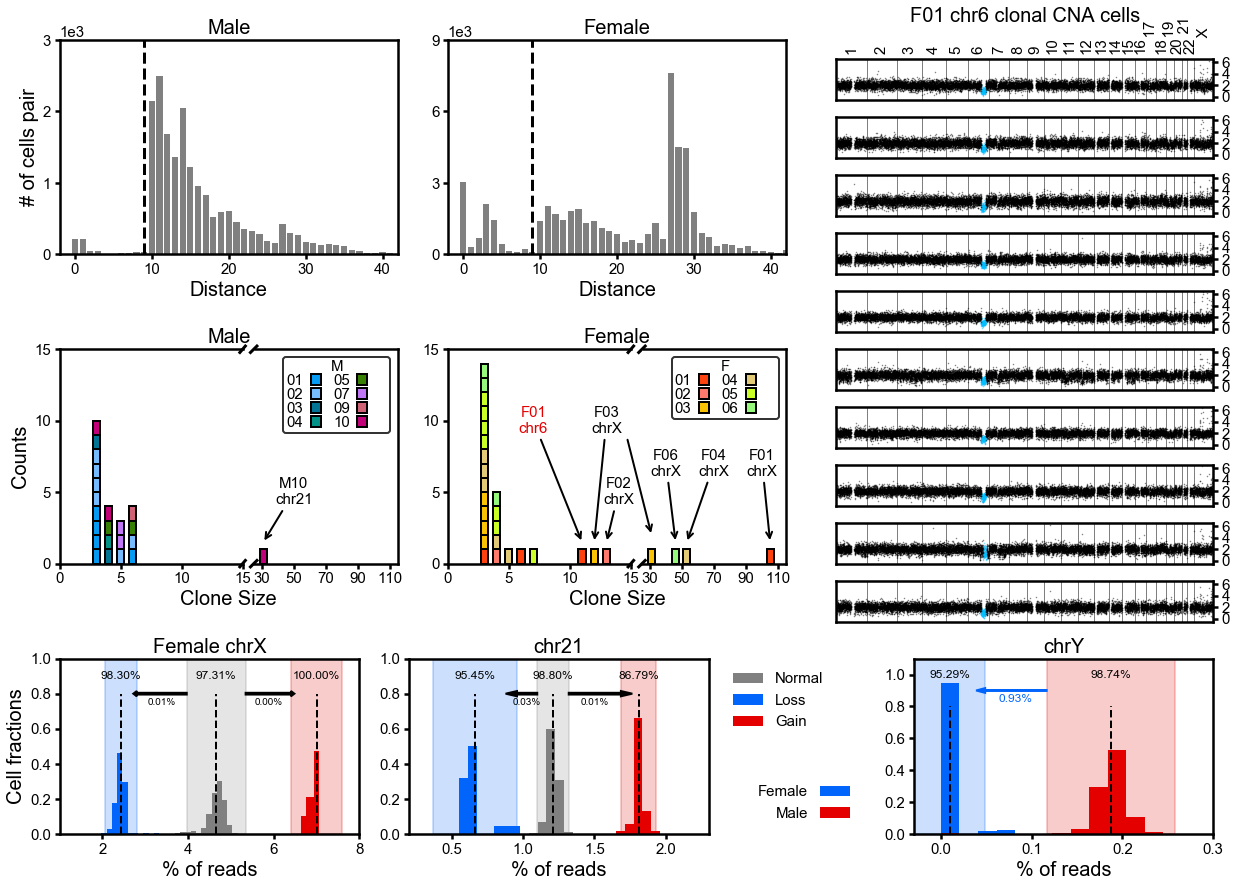

In [23]:
a4f = 2.5
width_a4f = 1.0
hight_a4f = 0.5

fig = plt.figure(figsize=(a4f*width_a4f*8.27,a4f*hight_a4f*11.69))
gs  = mpl.gridspec.GridSpec(nrows=42, ncols=30, figure=fig)

ax1 = fig.add_subplot( gs[ 0:12, 0:9  ] )
ax2 = fig.add_subplot( gs[ 0:12, 10:19 ] )

ax3 = fig.add_subplot( gs[ 16:28, 0:5  ], zorder=1 )
ax4 = fig.add_subplot( gs[ 16:28, 5:9  ], zorder=1 )
ax5 = fig.add_subplot( gs[ 16:28, 10:15 ], zorder=1 )
ax6 = fig.add_subplot( gs[ 16:28, 15:19 ], zorder=1 )

axt1 = fig.add_subplot( gs[ 16:28, 0:9  ], alpha=0, zorder=0 )
axt2 = fig.add_subplot( gs[ 16:28, 10:19], alpha=0, zorder=0 )
axt1.set_xticks([])
axt2.set_xticks([])
axt1.set_yticks([])
axt2.set_yticks([])
for i in axt1.spines: axt1.spines[i].set_visible(False)
for i in axt2.spines: axt2.spines[i].set_visible(False)
axt1.set_title('Male',fontsize=midsize)
axt2.set_title('Female',fontsize=midsize)
axt1.set_xlabel('\nClone Size',fontsize=midsize)
axt2.set_xlabel('\nClone Size',fontsize=midsize)

############################################################
ebar_plot(ax1, ax2)
############################################################
df1, df2 = clone_plot(ax3, ax4, ax5, ax6, FSAMPLE=FSAMPLE)

lg1 = add_clone_legend(ax4, FSAMPLE=FSAMPLE)
lg2 = add_clone_legend(ax6)

lg1.set_title('M', prop={'size':smallsize})
lg2.set_title('F', prop={'size':smallsize})

############################################################

ax6 = fig.add_subplot( gs[ 32:, 0:8  ] )
ax7 = fig.add_subplot( gs[ 32:, 9:17 ] )
axl = fig.add_subplot( gs[ 32:, 17:21 ] ) # Legend
ax8 = fig.add_subplot( gs[ 32:, 22:30 ] )

*rects_list, chrX_list1, chrX_list2, chrX_n = gain_loss_plot('chrX',  ax6)
*_, chr21_list1, chr21_list2, chr21_n = gain_loss_plot('chr21', ax7)
ax7.set_ylabel('')

axl.axis('off')

legend1 = axl.legend(
    handles=rects_list,
    labels=[r.get_label() for r in rects_list],
    loc='upper left',
    prop={'size':smallsize},
    frameon=False,
)
axl.add_artist(legend1)

*rects_list, y_loss_df = gain_loss_plot_chrY(ax8)
ax8.set_ylabel('')

axl.legend(
    handles=rects_list,
    labels=[r.get_label() for r in rects_list],
    loc='lower right',
    prop={'size':smallsize},
    frameon=False,
    markerfirst=False,
)

############################################################
############################################################
############################################################

clone_cells = sum_df.loc[big_cnv_idx].query('Space=="chr6" & Sample=="XXX" & chrom_fraction>15 & chrom_fraction<50')['Cell'].unique()

lax = None
for i,n in enumerate(np.arange(1,30,3)):
# for i,n in enumerate(np.arange(1,33,3)):
    ax_cell = fig.add_subplot( gs[ n:n+3, 20:  ] )    
    showCell(clone_cells[i], give_ax=[ ax_cell ], alpha=0.5, ms=1)
    ax_cell.set_ylabel('')
    ax_cell.yaxis.set_ticks_position('right')
    ax_cell.tick_params(axis='y', labelsize=smallsize, length=5)
    if not lax:
        lax = ax_cell
        
lax.set_xticks( ref.groupby('space',sort=False)['abs_pos'].min().rolling(2).mean()[1:] )
lax.set_xticklabels(
    ref['space'].drop_duplicates()[:-1].str.replace('chr','').replace('17','    17').replace('19','    19').replace('21','     21').replace('X','    X'),
    fontsize=smallsize,
    ha='center',
    rotation=90,
)
lax.xaxis.set_ticks_position('top')
lax.tick_params(axis='x', bottom=False, length=0, pad=5)
lax.set_title('F01 chr6 clonal CNA cells', fontsize=midsize, pad=-5)

fig.subplots_adjust(hspace=10,wspace=0.4)

plt.show()

fig.savefig('A4_fig3.pdf', frameon=False,  transparent=True, bbox_inches='tight')

---

In [41]:
from networkx.drawing.nx_agraph import graphviz_layout

In [42]:
nx_df1 = male_edis_df.query('d<10')
nx_df2 = female_edis_df.query('d<10')

G = nx.Graph()
G.add_nodes_from(nx_df1['a'].unique().tolist())
G.add_edges_from(nx_df1.loc[:,['a','b']].values, length=nx_df1['d'].values)

G.add_nodes_from(nx_df2['a'].unique().tolist())
G.add_edges_from(nx_df2.loc[:,['a','b']].values, length=nx_df2['d'].values)

n = 0
drop_nodes = []
for i,h in enumerate(nx.connected_components(G)):
    if len(h) == 2:
        drop_nodes.append(h)
    else:
        n+=1
    
for h in drop_nodes:
    G.remove_nodes_from(h)
    

G.remove_edges_from(nx_df1.query('d>10')[['a','b']].values)
pos = graphviz_layout(G)

xmax, ymax = pd.DataFrame(pos).max(axis=1).values
xmin, ymin = pd.DataFrame(pos).min(axis=1).values

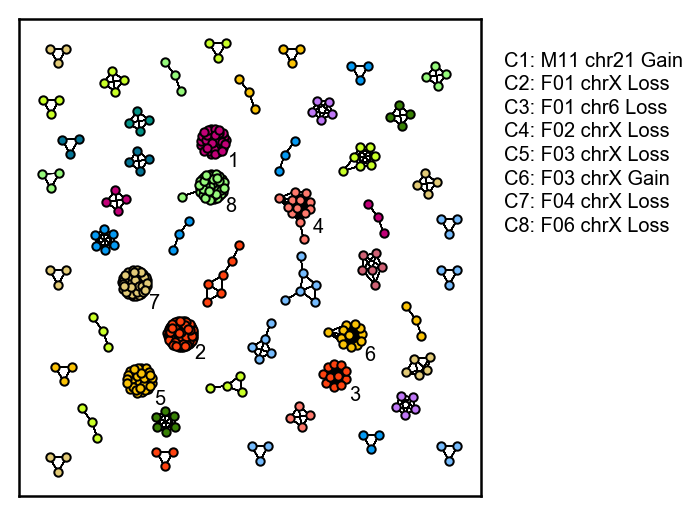

In [43]:
a4f = 2.5
width_a4f = 0.4
hight_a4f = 0.3

fig, ax = plt.subplots( 
    figsize=(a4f*width_a4f*8.27,a4f*hight_a4f*11.69),
)

lg_dict = {}
cid = 1
for i,h in enumerate(nx.connected_components(G)):
    s_color = color_dict[pd.Series(list(h)).str.split('_', expand=True)[0].unique()[0]]
    nx.draw_networkx(
        G, pos=pos, 
        nodelist=h, node_color=[s_color], 
        node_size=70, edgecolors='k', 
        with_labels=False,
        ax=ax,
        zorder=1,
    )
    s = pd.DataFrame(pos).T.loc[h]
    note = sum_df.set_index('Cell').loc[h].groupby(['Space','cnvTag'])['Pos'].count().sort_values().index[-1]
    code = xlsx_tab.set_index('SAMPLE').loc[s.index.str.split('_',expand=True).to_frame()[0].unique()[0], 'CODE']

#     if code not in lg_dict:
#         ax.scatter(xmax+1e2, ymax+1e2, s=70, color=s_color, label=code, zorder=0)
#         lg_dict[code] = True
        

    if len(h)>9:
        ax.text( s.mean()[0]+85, s.mean()[1]-85, cid, ha='center', va='center', fontsize=midsize)
        ax.text( xmax+200, ymax-cid*100, 'C{}: {} {} {}'.format(cid, code, note[0], note[1]), fontsize=midsize)
        cid+=1

ax.set_xlim(xmin-100,xmax+100)
ax.set_ylim(ymin-100,ymax+100)

# handles, labels = ax.get_legend_handles_labels()
# labels = [ i.replace('M11','M10') for i in labels]

plt.show()

# fig.savefig('A4_SI_clone.pdf', dpi=100, frameon=False,  transparent=True, bbox_inches='tight')
fig.savefig('A4_SI_clone.png', dpi=100, frameon=False,  transparent=True, bbox_inches='tight')